<a href="https://colab.research.google.com/github/Tommmster/AnalisisYCuracion/blob/master/CuraciondeDatos_entregable_parte_1y2_reversionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')


#!pip install matplotlib-venn
!pip install decouple

#from decouple import config
from sqlalchemy import create_engine, text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for decouple: filename=decouple-0.0.7-py3-none-any.whl size=4483 sha256=444988dda8896960eeb655d6f0c1ad52aa55b66cb4a034449dc9c18c42795811
  Stored in directory: /root/.cache/pip/wheels/c0/f8/ba/513f9e16fec0df6b2dfd693ae2c057773e912c478b6019f24f
Successfully built decouple


In [2]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

In [61]:
# melb_data es un archivo que contiene las propiedades a aquilar con descripcion de las mismas , habitaciones, precio, vendedor , fecha 
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')


In [62]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

# Dudas
2.1.1 No entendemos a qué transfomaciones se hace referencia. ¿Cuál es el punto del ejercicio? ¿Proveer un valor de precio por zipcode?

2.2.2 
- ¿Cómo podemos decidir el valor mínimo de ocurrencias por zipcode? Se habla de 30 ocurrencias.
- Preguntar si a partir de este punto generamos el archivo para seguir en el Entregable 2

2.2.3 

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)

# Ejercicio 1 SQL *Resolucion*


*1. Crear una base de datos en SQLite*

In [ ]:
import pandas as pd
from sqlalchemy import create_engine, text

# crea una conexion a la base de datos BDCuracion
engine = create_engine('sqlite:///BDCuracion.db', echo=True)

2. *Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.*

In [ ]:
melb_df.to_sql('melbourn', con=engine, if_exists="replace")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Aqui antes debemos subir el archivo generado en clase , el cual contiene los precios por codigos postal obtenido de la competencia de Kaggle
airbnb_df = pd.read_csv(
    '/content/airbnb_price_by_zipcode.csv')

In [ ]:
airbnb_df.to_sql('airbnb', con=engine, if_exists="replace")

3. *Implementar consultas en SQL que respondan con la siguiente información:
Cantidad de registros totales por ciudad. Cantidad de registros totales por barrio y ciudad.*

In [ ]:
query1 = 'SELECT COUNT(1) , CouncilArea FROM melbourn GROUP BY CouncilArea '
query2 = 'SELECT COUNT(1) ,  Suburb, CouncilArea FROM melbourn GROUP BY Suburb, CouncilArea '

queries = [query1, query2]

In [ ]:
with engine.connect() as con:
    for query in queries:
      rs = con.execute(query)
      print(query)
      for row in rs:
          print(row)

      print('\n\n')

4. *Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL para obtener un resultado similar a lo realizado con Pandas en clase.*

In [ ]:
query3= 'SELECT Suburb, Address, Rooms, Type, Price, Method, SellerG,Date, Distance, Postcode, Bedroom2, Bathroom, Car,  Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude,  Longtitude, Regionname, Propertycount, zipcode, airbnb_price_mean, airbnb_record_count, airbnb_weekly_price_mean, airbnb_monthly_price_mean FROM melbourn  LEFT JOIN airbnb on melbourn.Postcode=airbnb.zipcode'

with engine.connect() as con:
      rs = con.execute(query3)
      print(query)
      for row in rs:
          print(row)

      print('\n\n')


# Ejercicio 2 Resolución

 1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 


## Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import plotly.express as px
import numpy
import pandas

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

%matplotlib inline

#seteamos visualizacion 
pandas.options.display.float_format = '{:.2f}'.format
pandas.set_option('display.float_format', lambda x: '%.2f' % x)

Nos debemos centrar en la tarea de estimar el precio de cada propiedad, para ellos debemos conocer las caracteristicas de las mismas y el primer paso a realizar es una exploración de los datos y las distribuciones de sus variables, concocer si estas variables tienen nulos o valor cero, si esto es esperable o no, a los fines de conocer si son validas o no para ser elegidas para mi data set. Se aclara lo siguiente:

|melb_df | Contiene los datos de Melbourn melb_data.csv|
|--------|---------------------------------|
|airbnb_df | Contiene los datos de Airbnb |


In [65]:
#melb_df.describe() solo muestra variables numéricas
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

### Valores faltantes
Las siguientes variables tienen datos faltantes:


*   *YearBuilt*
*   *BuildingArea*
*   *CouncilArea*
*   *Car*



<Figure size 1800x1800 with 0 Axes>

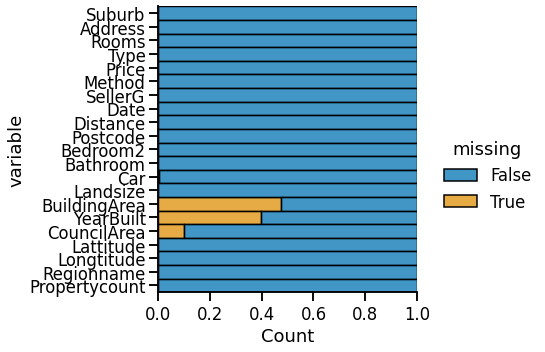

In [66]:
plt.figure(figsize=(25,25))
seaborn.displot(
    data=melb_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    palette = "colorblind",
    multiple="fill",
    aspect=1.25
)

### Valores cero
Vemos  valores 0 en las columnas
*  *Bedrooms2* 
*  *Bathroom* 
*  *Car* 
*  *Landsize* 
*  *BuildingArea*


In [63]:
min_values = melb_df.describe().loc['min']
min_values.sort_values()

Lattitude         -38.18
Distance            0.00
Bedroom2            0.00
Bathroom            0.00
Car                 0.00
Landsize            0.00
BuildingArea        0.00
Rooms               1.00
Longtitude        144.43
Propertycount     249.00
YearBuilt        1196.00
Postcode         3000.00
Price           85000.00
Name: min, dtype: float64

Estos puede haber sido por causado por una mala recoleccion de datos, o falta de datos.  Recordemos que tenemos 13580 casos, por lo cual hay variables con una cantidad muy chica de ceros, y otras con una cantidad importante. La pregunta a responder es: Son estos ceros valores posibles de la variable o datos faltantes codificados asi?.*

*Parece que hay variables con valores faltantes, que han sido reconocidos por pandas como NaN, y valores 0 que podrían ser tambien datos faltantes.*


*En esta muestra vemos las variables Landsize, BuildingArea, YearBuilt. con problemas potenciales*

*Landsize tiene valores 0.*

*BuildingArea y YearBuilt tienen NaN*

In [9]:
cols = melb_df[melb_df == 0].count(axis=0)
ds = cols[cols > 0]
ds

Distance           6
Bedroom2          16
Bathroom          34
Car             1026
Landsize        1939
BuildingArea      17
dtype: int64


---
### Selección de variables continuas
Para seleccionar las variables que nos permitan predecir el precio de una propiedad, calculamos la matriz de correlación y fijamos la columna `Price`. Removemos columnas que no son numéricas en naturaleza: `Lattitude`, `Longitude`, `Postcode`




In [67]:
melb_df.corr()['Price'].drop(['Lattitude', 'Longtitude', 'Postcode', 'Price'], inplace= False).sort_values()

YearBuilt       -0.32
Distance        -0.16
Propertycount   -0.04
Landsize         0.04
BuildingArea     0.09
Car              0.24
Bathroom         0.47
Bedroom2         0.48
Rooms            0.50
Name: Price, dtype: float64

Vemos que la cantidad de habitaciones y baños (`Rooms`, `Bedroom2`, `Bathroom`) parecen ser los mejores predictores de precio. A su vez, la antiguedad de la construcción influye negativamente en el valor de una propiedad, y tanto la cantidad de propiedades en el suburbio (`Propertycount`) como el tamaño de la propiedad (`Landsize`) y la superficie construida (`BuildingArea`) parecen tener poca correlación con el precio. Finalmente, la correlación entre el precio y la variable `Distance` parece no ser tan fuerte (hay un 'indicio' en que los precios caen a medida que la distancia al centro de la ciudad aumenta). Esta última variable no será incluida ya que puede ser cubierta por 

In [68]:
relevant_cont_vars = ['Bedroom2', 'Rooms', 'Bathroom', 'YearBuilt', 'Car']

### Selección de variables categóricas
En cuanto a las variables categóricas, vamos a comenzar eliminando las siguientes columnas

* `SellerG` (vendedor)
* `Date` (fecha de la transaccion)
* `Address` (dirección de la propiedad). En este caso particular, consideramos que esta información ya está presente en las columnas `Suburb`, `CouncilArea` y `Regionname`

In [69]:
categorical_vars = melb_df.select_dtypes(include=['object']).columns.values
categorical_vars

array(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date',
       'CouncilArea', 'Regionname'], dtype=object)

In [70]:
categorical_df = melb_df[categorical_vars]
categorical_df.nunique()

Suburb           314
Address        13378
Type               3
Method             5
SellerG          268
Date              58
CouncilArea       33
Regionname         8
dtype: int64

In [71]:
prop_type = {'u': 'Unidad (u)', 'h': 'Hotel (h)', 't': 'Townhouse(t)'}
vs = { prop_type[tipo] : melb_df[melb_df['Type'] == tipo].Price.mean() for tipo in categorical_df.Type.unique()}
sorted(vs.items(), key = lambda m: m[1], reverse= True)
  

[('Hotel (h)', 1242664.761138745),
 ('Townhouse(t)', 933735.0538599641),
 ('Unidad (u)', 605127.4845873384)]

In [15]:
melb_df.Type.value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

Utilizando la media, podemos ver el tipo de propiedad afecta el precio de los inmuebles.  Con el siguiente gráfico verificamos que la media y la mediana no son (muy) distintas

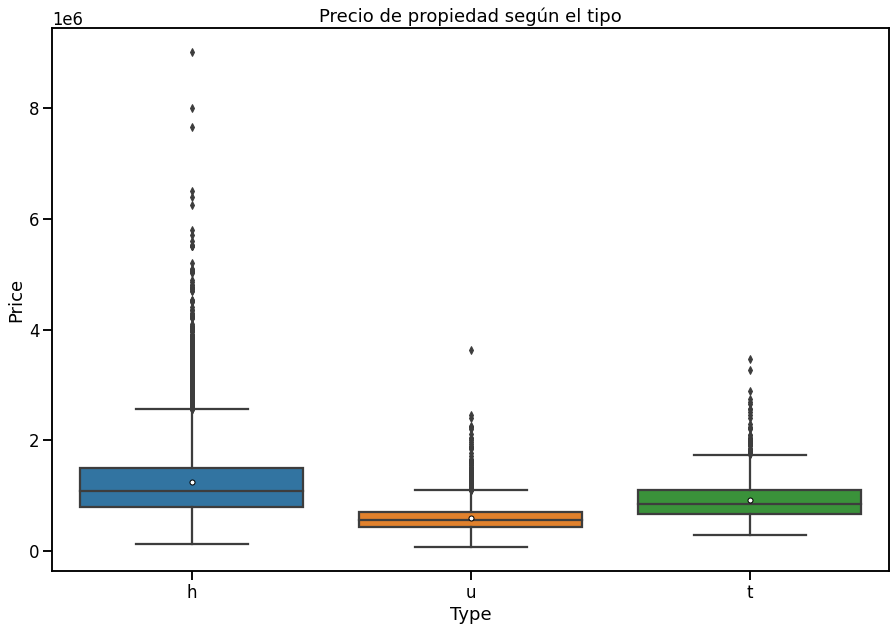

In [16]:
plt.figure(figsize=(15,10))
plt.title('Precio de propiedad según el tipo')
seaborn.boxplot(x="Type", y="Price",  data=melb_df, showmeans=True, meanprops={"marker":".",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

Respecto a la región (`Regionname`), vemos que también afecta al precio, aunque notamos que la cantidad de observaciones para esta variable no se encuentra balanceada

In [17]:
categorical_df.Regionname.value_counts()

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

Para aquellas regiones con pocas observaciones (aquellas regiones alejadas del centro), podemos ver que tanto la media como la mediana del precio tienen valores mas bajos

In [18]:
melb_df.groupby('Regionname')['Price'].agg(['mean', 'median','count']).sort_values(by='mean', ascending=False)

,mean,median,count
Regionname,,,
Southern Metropolitan,1372963.37,1250000.00,4695
Eastern Metropolitan,1104079.63,1010000.00,1471
South-Eastern Metropolitan,922943.78,850000.00,450
Northern Metropolitan,898171.08,806250.00,3890
Western Metropolitan,866420.52,793000.00,2948
Eastern Victoria,699980.79,670000.00,53
Northern Victoria,594829.27,540000.00,41
Western Victoria,397523.44,400000.00,32


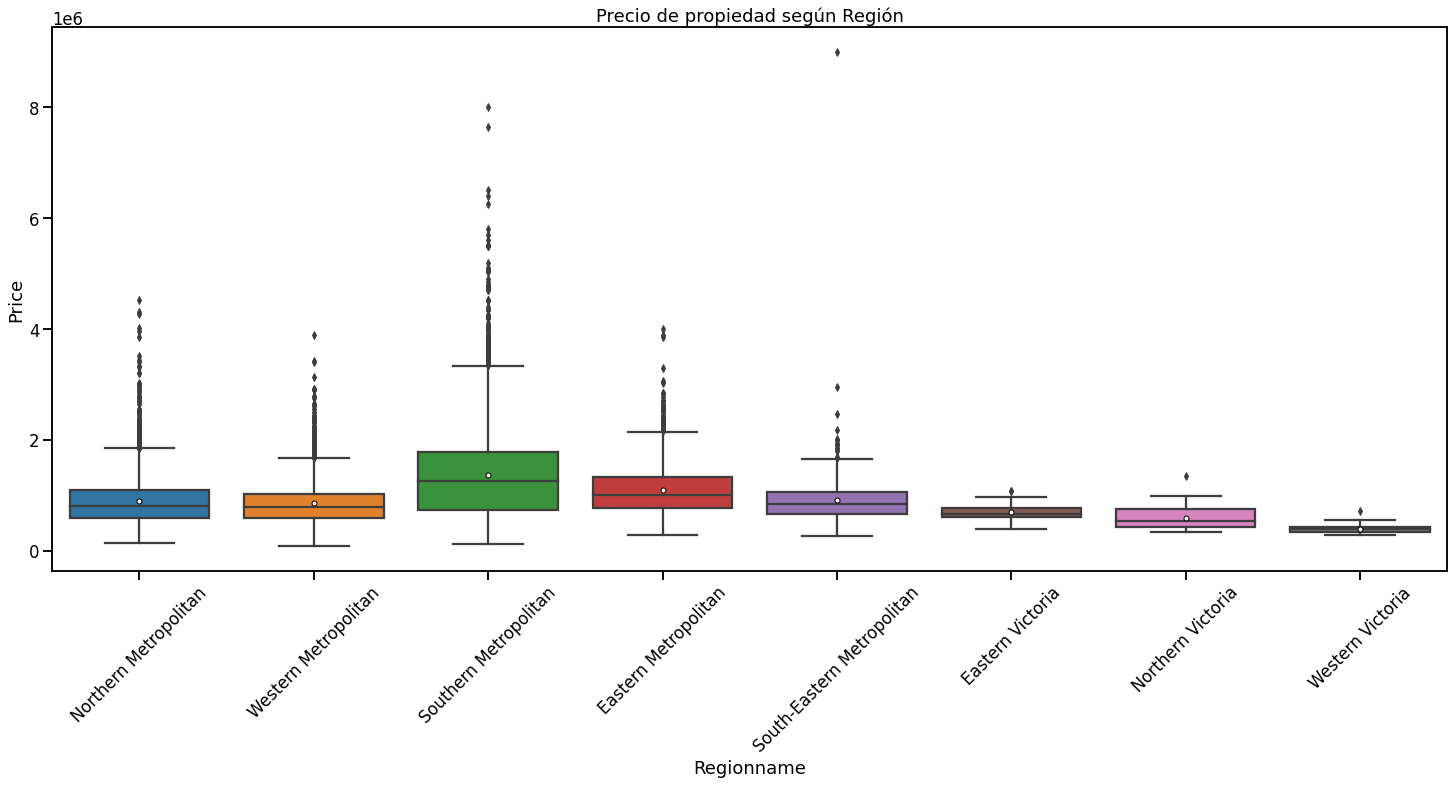

In [19]:
plt.figure(figsize=(25,10))
plt.title('Precio de propiedad según Región')
bp = seaborn.boxplot(x="Regionname", y="Price",  data=melb_df, showmeans=True, meanprops={"marker":".",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

bp.set_xticklabels(bp.get_xticklabels(), rotation=45)
pass

En cuanto al suburbio (`Suburb`), debido a la gran cantidad de valores distintos (superior a 300) se decidió agregar una nueva variable, que categorice al suburbio según el valor medio de las propiedades que contiene

In [20]:
grouped_by_suburb = melb_df.groupby('Suburb')['Price'].agg(['mean']).sort_values(by='mean', ascending=False).rename(columns = {'mean': 'mean_price'}, inplace = False)

type(grouped_by_suburb)
grouped_by_suburb[['mean_price']]



,mean_price
Suburb,
Kooyong,2185000.00
Canterbury,2180240.74
Middle Park,2082529.41
Albert Park,1941355.07
Brighton,1930158.00
...,...
Melton South,380736.11
Wallan,366000.00
Kurunjang,353000.00


Para realizar la categorización dividimos el espectro de precios medios en diez intervalos, y le asignamos un número a cada suburbio

In [21]:

# Fijamos las categorias a partir de los valores medios
max_price, min_price = grouped_by_suburb.mean_price.max(), grouped_by_suburb.mean_price.min()
n_suburb_classes = 10
bucket_width = (max_price - min_price) / n_suburb_classes

# Esto es puramente ilustrativo, para mostrar los límites de los intervalos
[min_price + bucket_width * n for n in range(11)]

[285000.0,
 475000.0,
 665000.0,
 855000.0,
 1045000.0,
 1235000.0,
 1425000.0,
 1615000.0,
 1805000.0,
 1995000.0,
 2185000.0]

In [22]:
def assign_suburb_class(e, value):
  """
  Return a suburb class. Lower is cheaper
  """
  v = (value(e) - min_price) // bucket_width
  return "S_{}".format(int(v))


grouped_by_suburb['Suburb_cat'] = grouped_by_suburb.apply(assign_suburb_class, axis = 1, args = [lambda g: (g.mean_price)])


print(f"width: {bucket_width}, min: {min_price} top: {max_price}")


# drop the mean price, it's no longer useful
grouped_by_suburb.drop (columns=['mean_price'], inplace = True)
grouped_by_suburb

width: 190000.0, min: 285000.0 top: 2185000.0


,Suburb_cat
Suburb,
Kooyong,S_10
Canterbury,S_9
Middle Park,S_9
Albert Park,S_8
Brighton,S_8
...,...
Melton South,S_0
Wallan,S_0
Kurunjang,S_0


In [23]:
grouped_by_suburb['Suburb_cat'].value_counts()

S_1     74
S_2     71
S_3     58
S_4     44
S_5     26
S_7     13
S_0     11
S_6     10
S_8      4
S_9      2
S_10     1
Name: Suburb_cat, dtype: int64

In [24]:
# generamos un nuevo dataframe 
melb_df_2 = pandas.merge(left = melb_df, right = grouped_by_suburb, left_on = 'Suburb', right_index = True)
melb_df_2.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Suburb_cat'],
      dtype='object')

In [25]:
# verificamos que los datos siguen iguales
melb_df_2[['Suburb', 'Suburb_cat']].drop_duplicates().groupby(['Suburb_cat']).count()

,Suburb
Suburb_cat,
S_0,11
S_1,74
S_10,1
S_2,71
S_3,58
S_4,44
S_5,26
S_6,10
S_7,13


Los valores de `CouncilArea` (se refieren al area de gobierno dentro del tejido urbano) no serán modificados

In [45]:
relevant_cat_vars = ['Regionname', 'Type', 'Suburb_cat', 'CouncilArea', 'Postcode']

Vamos a trabajar con las variables **Rooms**, **Bathroom**, **Car**, **Type**, **Regionname**, **BuildingArea**, **Method**, **Landsize**, relacionada con la variable a predecir: **Price**. 


Para comenzar analizamos aquellas variables que describen la propiedad por si misma, de acuerdo a sus caracteristicas y considerando algunos aspectos esperados. Por ejemplo si el tipo de casa es `h` (*house*) se espera que tenga por lo menos 1 baño (*bathroom*), dormitorio (*bedroom2*) o 1 ambiente(*rooms*).

In [46]:
#interesting_variables = ['Rooms', 'Car', 'Type', 'Regionname', 'BuildingArea', 'Landsize']
interesting_variables = relevant_cont_vars + relevant_cat_vars
interesting_variables

['Bedroom2',
 'Rooms',
 'Bathroom',
 'YearBuilt',
 'Regionname',
 'Type',
 'Suburb_cat',
 'CouncilArea',
 'Postcode']

In [47]:
melb_df = melb_df_2 [interesting_variables]

### Valores extremos

Una vez seleccionadas las columnas, pasamos a analizar los valores extremos

In [48]:
#melbourne df subset
melb_df = melb_df_2[interesting_variables]

In [49]:
melb_df[interesting_variables].describe()

,Bedroom2,Rooms,Bathroom,YearBuilt,Postcode
count,13580.00,13580.00,13580.00,8205.00,13580.00
mean,2.91,2.94,1.53,1964.68,3105.30
std,0.97,0.96,0.69,37.27,90.68
min,0.00,1.00,0.00,1196.00,3000.00
25%,2.00,2.00,1.00,1940.00,3044.00
50%,3.00,3.00,1.00,1970.00,3084.00
75%,3.00,3.00,2.00,1999.00,3148.00
max,20.00,10.00,8.00,2018.00,3977.00


Si bien existe un registro con un valor de `20` y un registro con un valor de `10` para la columna `Bedroom2`, no eliminamos esos registros ya que los valores en las columnas restantes no contienen valores extremos


In [51]:
melb_df[melb_df.Bedroom2 == 20 ]

,Bedroom2,Rooms,Bathroom,YearBuilt,Regionname,Type,Suburb_cat,CouncilArea,Postcode
7404,20.00,3,1.00,NaN,Southern Metropolitan,h,S_4,Glen Eira,3145.00


In [53]:
melb_df[melb_df.Bedroom2 == 10 ]

,Bedroom2,Rooms,Bathroom,YearBuilt,Regionname,Type,Suburb_cat,CouncilArea,Postcode
11304,10.00,10,3.00,2006.00,Northern Metropolitan,h,S_2,Darebin,3083.00


In [50]:
melb_df[interesting_variables].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13580 entries, 0 to 13494
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bedroom2     13580 non-null  float64
 1   Rooms        13580 non-null  int64  
 2   Bathroom     13580 non-null  float64
 3   YearBuilt    8205 non-null   float64
 4   Regionname   13580 non-null  object 
 5   Type         13580 non-null  object 
 6   Suburb_cat   13580 non-null  object 
 7   CouncilArea  12211 non-null  object 
 8   Postcode     13580 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.5+ MB


De las columnas analizadas podemos concluir lo siguiente:
* Se considera que aquellas variables que informan sobre las caracteristicas 
del inmueble: **Bedroom2**, **Rooms**, **Bathrooms** son relevantes para el analisis de prediccion del Precio, dado que segun las graficas observadas puede apreciarse su distribucion es bastante razonable.


In [32]:
melb_df.columns

Index(['Bedroom2', 'Rooms', 'Bathroom', 'YearBuilt', 'Regionname', 'Type',
       'Suburb_cat', 'CouncilArea'],
      dtype='object')

In [33]:
# se eliminara la columna Bedroom2 , previamente se efectuara una copia del dataframe.

melb_df_bkp = melb_df.copy(deep=True)

melb_df=melb_df.drop('Bedroom2',axis=1)

melb_df.columns

Index(['Rooms', 'Bathroom', 'YearBuilt', 'Regionname', 'Type', 'Suburb_cat',
       'CouncilArea'],
      dtype='object')

---
## Ejercicio 2, parte 2 


2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

1. *Analizamos las variables dadas en el archivo de AirBnB consideramos las mas relavantes:*

In [37]:
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude','property_type', 'bathrooms', 'bedrooms'
]



In [38]:
df_airbnb_adic = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [39]:
len(df_airbnb_adic)

22895

In [40]:
df_airbnb_adic.zipcode.value_counts()[:5]

3000.0    2491
3000       876
3006.0     860
3182.0     579
3182       556
Name: zipcode, dtype: int64

 Sin embargo, la columna **zipcode** tiene tipos diferentes. Debemos estandarizarlo antes de continuar con la combinación de los dato

In [41]:
df_airbnb_adic['zipcode'] = pandas.to_numeric(df_airbnb_adic.zipcode, errors='coerce')

In [42]:
df_airbnb_adic.zipcode.value_counts()

3000.00     3367
3006.00     1268
3182.00     1135
3141.00      881
3004.00      728
            ... 
3785.00        1
3096.00        1
30122.00       1
3912.00        1
4068.00        1
Name: zipcode, Length: 247, dtype: int64

de esta forma unificamos el formato del campo zipcode. Y
Necesitamos establecer una relación entre conjuntos de datos `df_melbourne` y `df_airbnb_adic` a través de este campo, pero primero debemos verificar que los codigos postales correspondan a la misma zona. Para ello primero realizaremos la intersección y realizamos un análisis al respecto:

In [44]:
# buscamos la intersecion de los 248 valores de AIRBNB 191 tambien estan en melb 
intersection = numpy.intersect1d(
    df_airbnb_adic.zipcode.values, melb_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(df_airbnb_adic.zipcode.unique()))
print("Sales unique zipcodes", len(melb_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

AttributeError: ignored

Como se puede apreciar hay **248** valores de **zipcode** distintos en el conjunto de datos de *Airbnb* y **198** en el de **Melbourne**. A su vez hay **191** valores en común en ambos conjuntos de datos.

In [ ]:
print('Records in Sales df with corresponding zipcode form Airbnb df',
      melb_df.Postcode.isin(intersection).sum() / len(melb_df))
print('Records in Airbnb df with corresponding zipcode form Sales df',
      df_airbnb_adic.zipcode.isin(intersection).sum() / len(df_airbnb_adic))

Se puede observar que hay un 99%  estan en la interseccion , no asi de los que estan en el dataframe de Airbnb. 

### Filtrado de zipcodes

Eliminamos los valores de zipcode con tres o menos ocurrencias

In [34]:
threshold = 3
zipcode_counts = df_airbnb_adic.zipcode.value_counts()
size_filter = zipcode_counts > threshold
print(len(zipcode_counts[size_filter]))
print(len(zipcode_counts[~size_filter]))

selected_zipcodes = zipcode_counts[size_filter]

NameError: ignored

In [ ]:
selected_zipcodes = zipcode_counts[size_filter].index.array
df_airbnb_adic = df_airbnb_adic[df_airbnb_adic.zipcode.isin(selected_zipcodes)]
df_airbnb_adic.sample(5)

Observamos que podemos agregar como datos: el promedio de precio semanal (*weekly_price*), promedio de precio mensual (*monthly_price*).

In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price']

In [ ]:

df_airbnb_adic[relevant_cols + ['zipcode']].groupby('zipcode').mean().reset_index()[:5]

In [ ]:
# Agregamos algunas columnas relevantes 
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode', 'street', 'neighborhood', 'city','suburb']#, 'state', 'latitute', 'longitude']

airbnb_price_by_zipcode = df_airbnb_adic[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': 'mean',
        'monthly_price': 'mean', 'street': 'count', 'neighborhood': 'count', 'city': 'count','suburb': 'count'})\
  .reset_index()

In [ ]:
airbnb_price_by_zipcode

In [ ]:
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'monthly_price mean': 'airbnb_monthly_price_mean'}
)
airbnb_price_by_zipcode[:3]

In [ ]:
# ahora hacemos la interseccion en pandas

merged_sales_df = melb_df.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode')


In [ ]:
merged_sales_df[:3]

In [87]:
from google.colab import files

filename = "melb_df_filtered_columns.csv"
melb_df.to_csv(filename) 
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicio 2, Punto 3 Otras columnas

Para seleccionar columnas candidatas que sirvan para combinar ambos conjuntos de datos podemos plantear los siguientes criterios

* Agrupar por variables estructurales. Por ejemplo, cantidad de habitaciones o baños
* Agrupar por ubicación dentro del área urbana, como ser suburbio o barrio

* Agregar por espacio para estacionar. Si bien no existe explícitamente en el conjunto de datos de airbnb, si se puede derivar a partir de la columna `amenities`
* Por areas poligonales definidas en un catálogo. A partir de los valores de latitud y longitud (disponibles en ambos conjuntos de datos) se puede evaluar la pertenencia de la propiedad dentro de un area arbitraria.





Finalmente tomamos las columas que indican
* Cantidad de baños (`Bathroom` / `bathrooms`)
* Ubicación de la propiedad (`Suburb` / `street`)

La justificación se basa en que se analizan dimensiones distintas de cada propiedad, y que existe una correlación entre la cantidad de baños y otros parametros de una casa o departamento.



---



In [72]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [73]:
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')

airbnb_df.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (35,77) have mixed types.Specify dtype option on import or set low_memory=False.



Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighborhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 

#### Por ubicación

Se puede hacer una correspondencia entre los valores la columna `Suburb` del conjunto de datos `melb_df` y un subconjunto de los presentes en la columna `street` del conjunto de datos `airbnb_df`

In [74]:
melb_df.Suburb.value_counts()

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Sandhurst           1
Bullengarook        1
Croydon South       1
Montrose            1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64

In [75]:
airbnb_df[airbnb_df.street.str.contains('Melbourne')].street.value_counts()

Melbourne, VIC, Australia                            4222
North Melbourne, VIC, Australia                       340
South Melbourne, VIC, Australia                       284
West Melbourne, VIC, Australia                        262
Port Melbourne, VIC, Australia                        253
East Melbourne, VIC, Australia                        191
Melbourne , VIC, Australia                             30
Melbourne, Australia                                    9
Victoria, Melbourne, Australia                          6
Brighton East, Melbourne, VIC, Australia                4
Fitzroy, Melbourne, VIC, Australia                      3
Melbourne City, VIC, Australia                          3
Elwood, Melbourne, VIC, Australia                       3
Melbourne, Victoria, AU, VIC, Australia                 3
Melbourne, Vic, Australia                               3
Port Melbourne, Australia                               3
Melbourne , Vic, Australia                              2
Melbourne , vi

#### Columna candidata: Tipo de propiedad

Ambos conjuntos de datos tienen una columna que indica el tipo de propiedad. Esta columna ces 

In [76]:
airbnb_df.property_type.value_counts()

Apartment                 12469
House                      5967
Townhouse                  1434
Condominium                 544
Serviced apartment          500
Villa                       326
Guesthouse                  276
Bed and breakfast           263
Guest suite                 260
Loft                        191
Cottage                     157
Bungalow                    157
Other                        49
Cabin                        46
Boutique hotel               44
Farm stay                    43
Hostel                       32
Tiny house                   25
Camper/RV                    16
Aparthotel                   12
Hotel                        11
Campsite                     10
Earth house                  10
Tent                          9
Nature lodge                  8
Boat                          8
Resort                        6
Barn                          5
Chalet                        4
Castle                        4
Hut                           3
Treehous

In [77]:
melb_df.Type.value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

#### Columna candidata : Baños

In [78]:
airbnb_df.bathrooms.value_counts()

1.00     16568
2.00      3681
1.50      1290
2.50       657
3.00       324
3.50       110
0.50        81
4.00        70
5.00        34
0.00        31
4.50        11
6.00         6
5.50         6
7.00         2
6.50         2
8.00         1
14.00        1
9.00         1
7.50         1
10.00        1
Name: bathrooms, dtype: int64

In [79]:
melb_df.Bathroom.value_counts()

1.00    7512
2.00    4974
3.00     917
4.00     106
0.00      34
5.00      28
6.00       5
7.00       2
8.00       2
Name: Bathroom, dtype: int64

Si bien las distribuciones no son exactamente iguales (y deben curarse los casos donde figuran fracciones de baños), esta columna es una buena candidata ya que ambas variables presentan una distribución similar

In [80]:
melb_df.Bathroom.describe()

count   13580.00
mean        1.53
std         0.69
min         0.00
25%         1.00
50%         1.00
75%         2.00
max         8.00
Name: Bathroom, dtype: float64

In [81]:
airbnb_df.bathrooms.describe()

count   22878.00
mean        1.29
std         0.58
min         0.00
25%         1.00
50%         1.00
75%         1.50
max        14.00
Name: bathrooms, dtype: float64

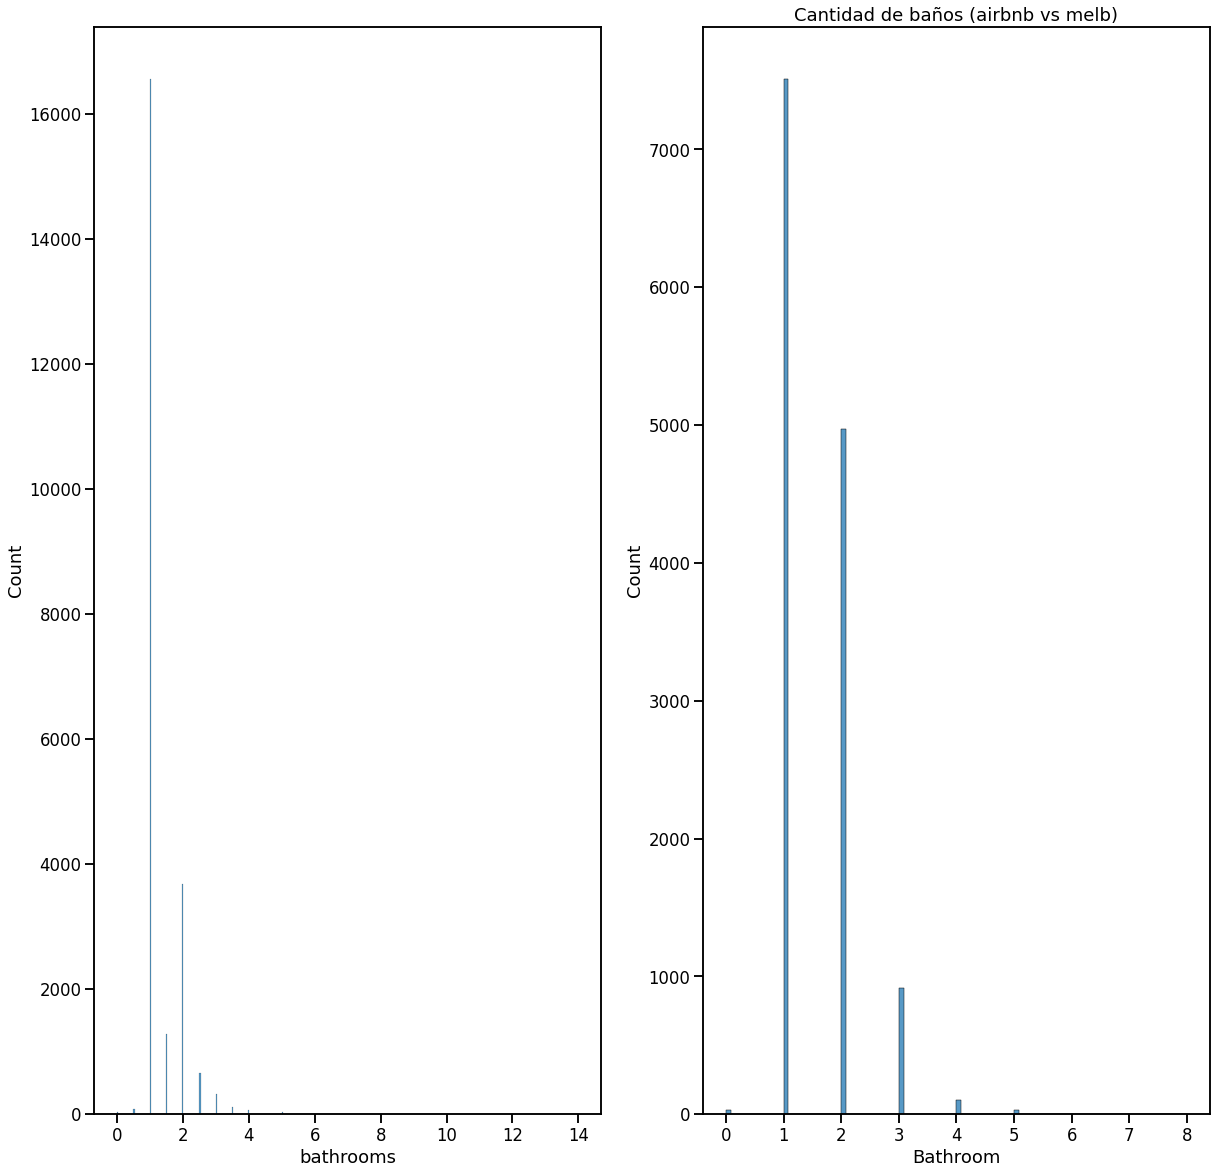

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 20))
plt.title('Cantidad de baños (airbnb vs melb)')

seaborn.histplot(data = airbnb_df, x='bathrooms', ax=ax1)
seaborn.histplot(data = melb_df, x='Bathroom', ax=ax2)

#### Columna candidata: Espacio para estacionar

Mas de `2/3` de las propiedades en el conjunto de datos de airbnb contienen espacio para estacionar

In [83]:
def naive_parking_detector(s):
  """
  Naive check to validate if an airbnb property includes parking space.
  It assumes that the word 'parking' is not preceded or followed by a negative
  modifier, such as 'no parking' or 'parking forbidden'. 
  Also, performance is not considered as a factor.
  """
  r = s.replace("{", "").replace("}", "")\
  .replace('"','').lower()

  return 'parking' in r.lower()

airbnb_df['car'] = airbnb_df.amenities.apply(naive_parking_detector)
airbnb_df.car.value_counts()

True     16815
False     6080
Name: car, dtype: int64

En el conjunto de datos de Melbourne, la proporción es aún mas alta.

In [84]:
print(len(melb_df))
len(melb_df[melb_df.Car > 0])

13580


12492